In [1]:
import os
from utils.configuration import *
from sklearn.model_selection import train_test_split

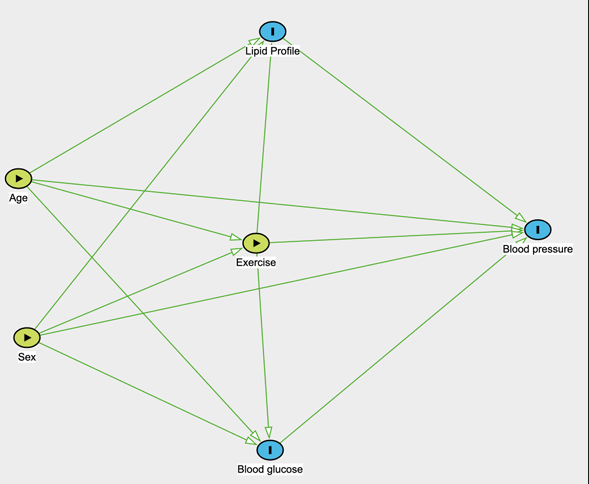

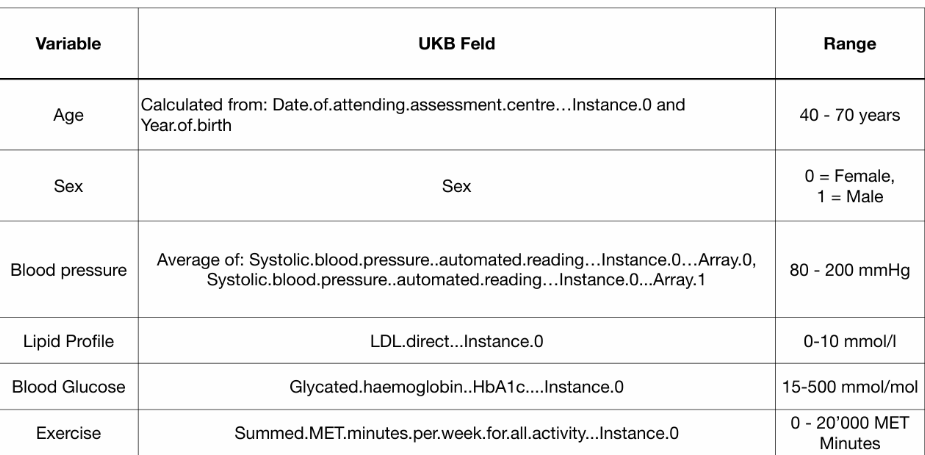

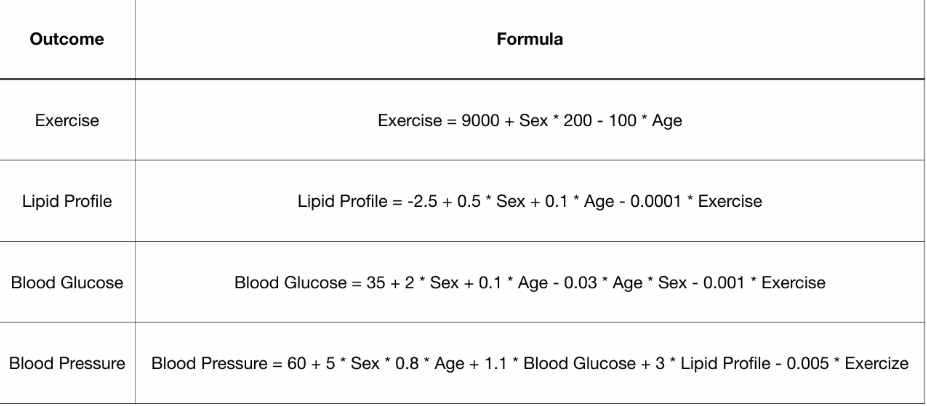

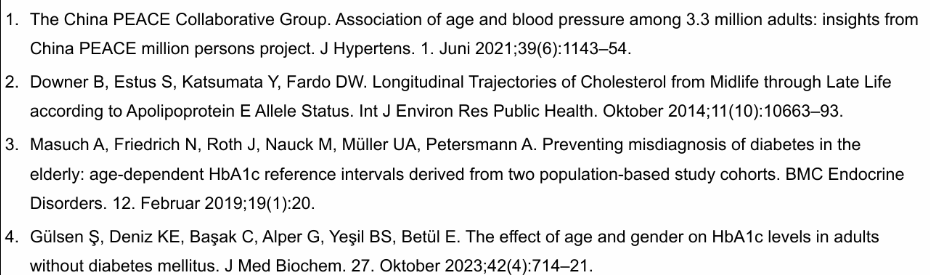

In [2]:
experiment_name = "ukb_first_experiment"      ## <--- set experiment name
LOG_DIR="/home/bule/TramDag/dev_experiment_logs"  ## <--- set log directory
EXPERIMENT_DIR = os.path.join(LOG_DIR, experiment_name)
CONF_DICT_PATH = os.path.join(EXPERIMENT_DIR, f"configuration.json")
setup_configuration(experiment_name,EXPERIMENT_DIR)

Created new configuration file at /home/bule/TramDag/dev_experiment_logs/ukb_first_experiment/configuration.json


In [4]:
df=pd.read_csv(os.path.join(EXPERIMENT_DIR,"UKB_subset_jd_oct25.csv"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501931 entries, 0 to 501930
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   age       501931 non-null  float64
 1   sex       501931 non-null  int64  
 2   bp        456435 non-null  float64
 3   lipid     468175 non-null  float64
 4   glucose   465980 non-null  float64
 5   exercise  384831 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 23.0 MB


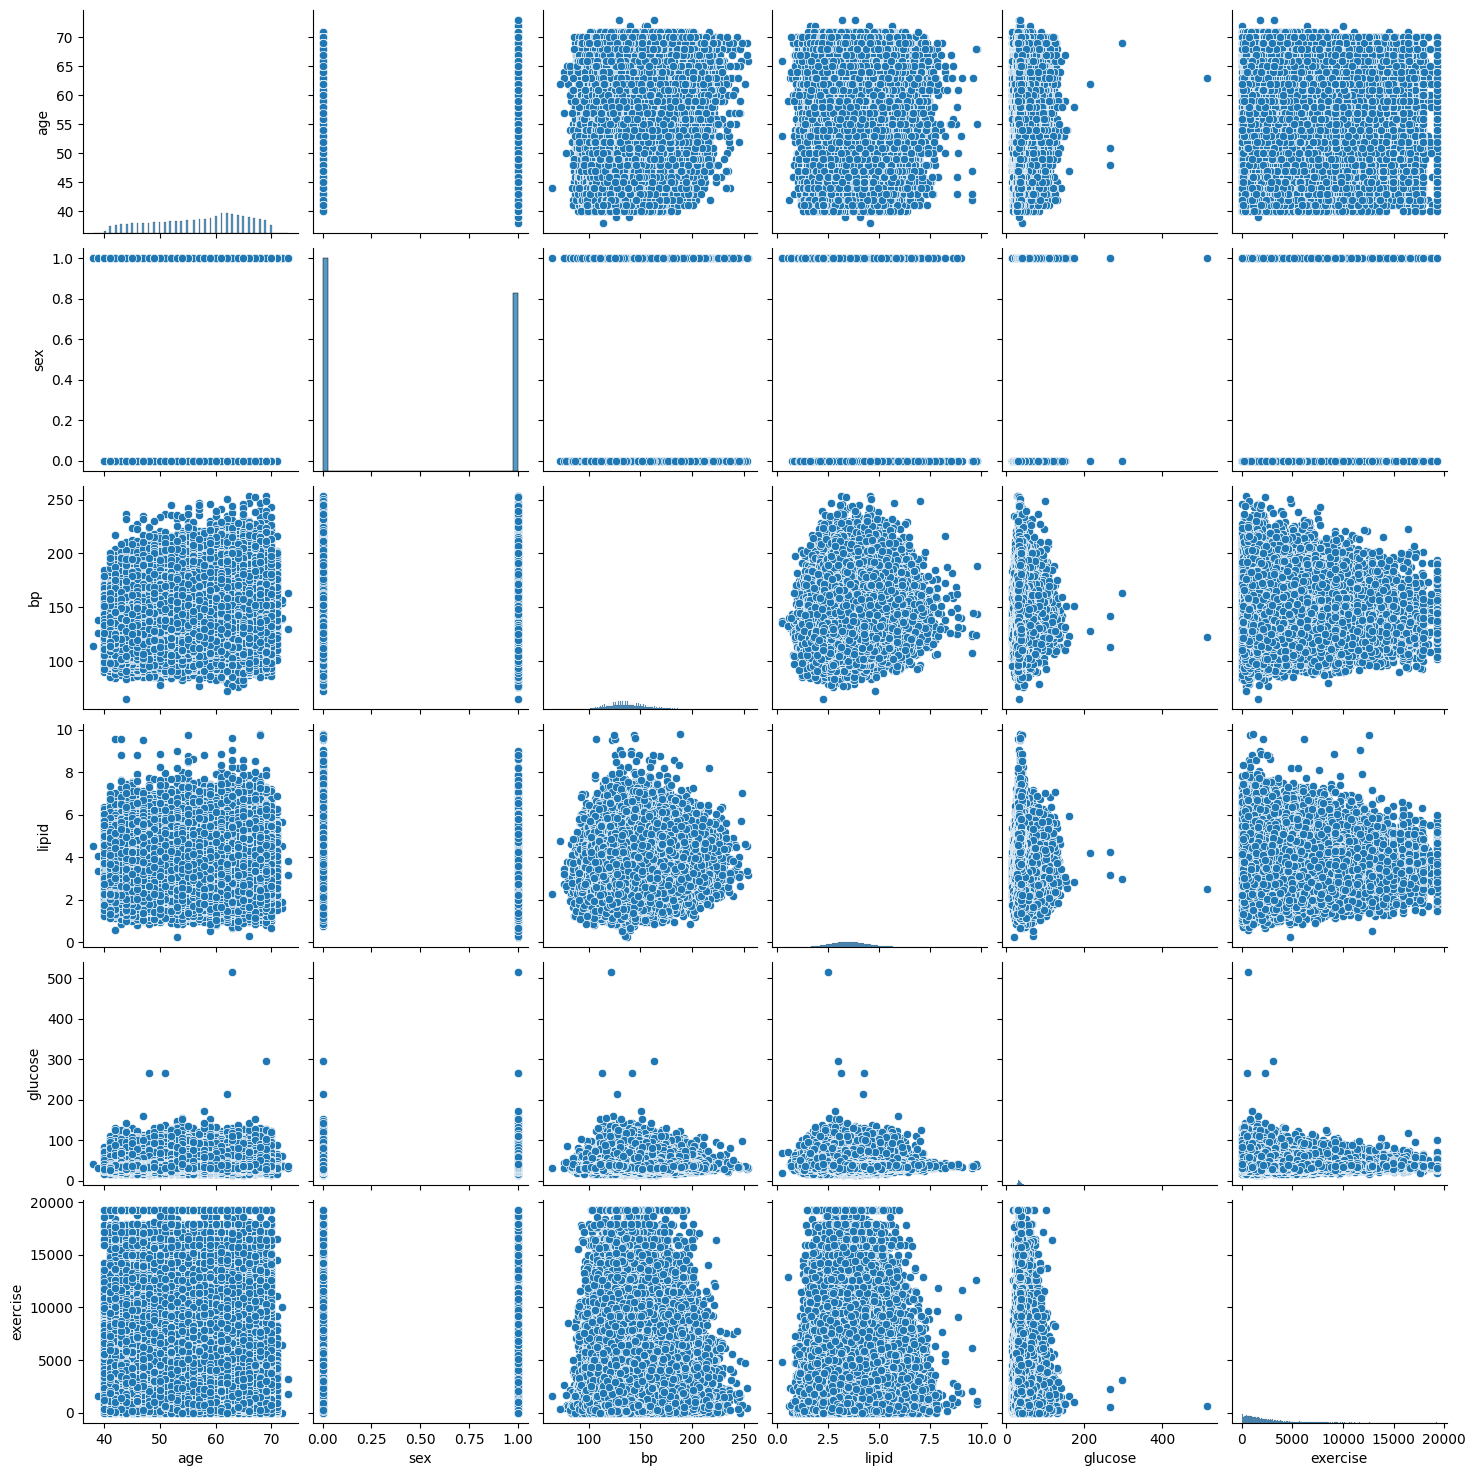

In [5]:
df.info()
sns.pairplot(df)

In [8]:
df.describe()

,age,sex,bp,lipid,glucose,exercise
count,501931.000000,501931.000000,456435.000000,468175.000000,465980.000000,384831.000000
mean,57.043618,0.456035,137.782788,3.556376,36.132487,2644.953106
std,8.102636,0.498064,18.626290,0.870037,6.777457,2653.212517
min,38.000000,0.000000,65.000000,0.266000,15.000000,0.000000
25%,51.000000,0.000000,124.500000,2.944000,32.800000,813.000000
50%,58.000000,0.000000,136.000000,3.516000,35.200000,1786.000000
75%,64.000000,1.000000,149.500000,4.117000,37.900000,3564.000000
max,73.000000,1.000000,253.500000,9.797000,515.200000,19278.000000


In [6]:
df.columns

Index(['age', 'sex', 'bp', 'lipid', 'glucose', 'exercise'], dtype='object')

In [7]:
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
print(f"Train size: {len(train_df)}, Validation size: {len(val_df)}, Test size: {len(test_df)}")

data_type= {'age':'continous',
            'sex':'ordinal_Xn_Yo',
            'exercise':'continous',
            'lipid':'continous',
            'glucose':'continous',
            'bp':'continous'
            } 
write_data_type_to_configuration(data_type, CONF_DICT_PATH)

Train size: 401544, Validation size: 50193, Test size: 50194
---------------------------------------------------------------------------------------------------------
                                       |                       MODEL SETTINGS                       
Variable             | dtype           | As Predictor                   | As Target                     
---------------------------------------------------------------------------------------------------------
age                  | continous       | continuous [c]                 | continuous [c]                
sex                  | ordinal_Xn_Yo   | ordinal [0,…,K]                | ordinal    [0,…,K]            
exercise             | continous       | continuous [c]                 | continuous [c]                
lipid                | continous       | continuous [c]                 | continuous [c]                
glucose              | continous       | continuous [c]                 | continuous [c]             